In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import timeit

## Question 1 

Written problems are at bottom of the file

In [7]:
def heat(x): 
    if 0 <= x <= np.pi/2:
        return x 
    elif np.pi/2 <= x <= np.pi:
        return np.pi - x

def forward_heat(t, x, D, N, M):
    dx    = np.pi/(M-1) # x 
    dt    = T/(N-1) # t
    scale = (D*t)/dx**2
    print("Alpha equal to ", scale)
    
    
    u     = np.zeros(M+1)
    u1   = np.zeros(M+1)
    
    for i in range(0, M+1):
        u1[i] = heat(x[i])
        
    for n in range(0, N):
        for i in range(1, M):
            u[i] = scale*u1[i-1] +(1-2*scale)*u1[i]+scale*u1[i+1]
            
        u[0] = 0
        u[M] = 0
            
        u1, u = u, u1
    
    return u

In [10]:
N = 100
M = 100
T = 2
L = np.pi
mesht = np.linspace(0, T, N+1) # mesh points in time
x = np.linspace(0, L, M+1) # mesh points in space
print(mesht)
D = 3

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


Alpha equal to  60.18478308354863


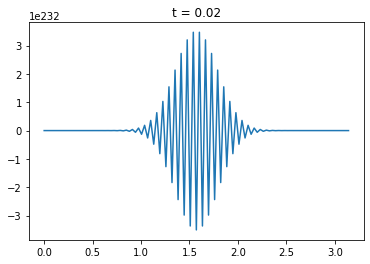

Alpha equal to  0.5958293525271315


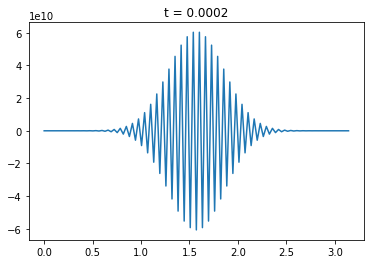

In [11]:
# Testing Stability

t = T/(N-1)
u = forward_heat(t, x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.02")
plt.show()

t = 0.0002
u = forward_heat(t, x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.0002")
plt.show()

Alpha equal to  0.5064549496480617


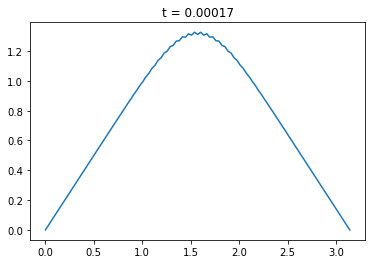

Alpha equal to  0.49155921583488343


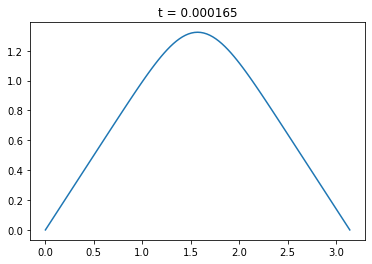

Alpha equal to  0.002979146762635657


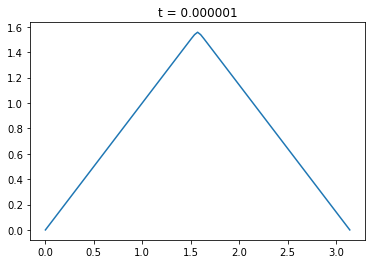

Alpha equal to  0.0002979146762635657


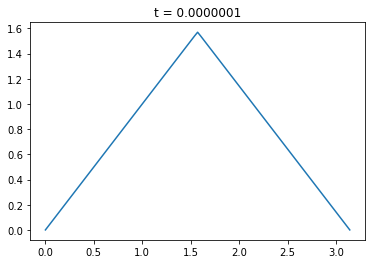

In [12]:
# Testing stability 

t = 0.00017
u = forward_heat(t, x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.00017")
plt.show()

t = 0.000165       # Not quite stable, observe when alpha is less than 0.5
u = forward_heat(t, x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.000165") 
plt.show()

t = 0.000001
u = forward_heat(t, x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.000001")
plt.show()

t = 0.0000001
u = forward_heat(t,x,D,N,M)
plt.plot(x,u)
plt.title("t = 0.0000001")
plt.show()


Notice when delta t = 0.2, the scheme is clearly unstable. When delta t = 0.0000001, the scheme is stable. 

We see that when delta t gets smaller, the more stable the scheme. A positive alpha for which the scheme is unstable is a > 0.5
and a positive alpha for which the scheme is stable is a < 0.5.

## Question 2

1e-07


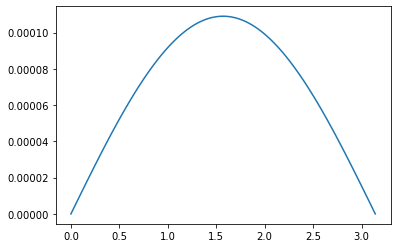

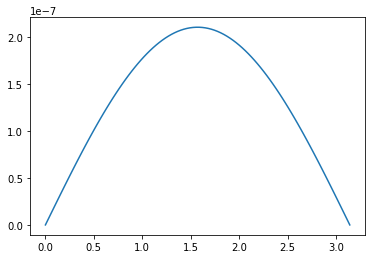

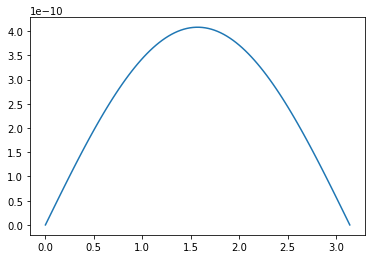

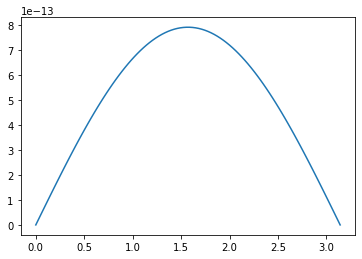

In [13]:
def backward_heat(x,t,D,N,M,mesht):
    dx = t
    scale=(D*t)/dx**2
    A=np.zeros((M-2,M-2))
    for i in range(0,M):
        x[i]=heat(x[i])
    x = x[1:M-1]
    result = []
    for i in range(len(mesht)):
        for i in range(0,M-2):
            # Implement a tridiagonal matrix 

            A[i][i]=1+2*scale
            if i == 0:
                A[i][i+1] = -scale
            elif i == M-2:
                A[i][i-1] = -scale 
            else:
                A[i][i-1]= -scale
                A[i-1][i]= -scale
        for i in range(N+1):
            if i == 0:
                u_next = x
            else:
                u_next=np.linalg.solve(A,x) # Un+1
                x = u_next

        u_next = np.insert(u_next, 0, 0)
        u_next = np.insert(u_next, len(u_next), 0)
        result.append(u_next)
    return result

N = 100
M = 100
T = 2
L = np.pi
mesht = np.linspace(0, T, N) 
meshx = np.linspace(0, L, M) 
x2 = np.linspace(0, L, M)
D = 1
print(t)


t = np.pi/(M-1)
u = backward_heat(x, t, D, N, M, mesht)

for i in range(1,5):
    plt.plot(x2, u[i*2])
    plt.show()
    
plt.show()

We see that the backward Euler is unconditionally stable, and we have seen from earlier that the forward euler is conditionally stable. *I used np.linalg to produce my result and plots.

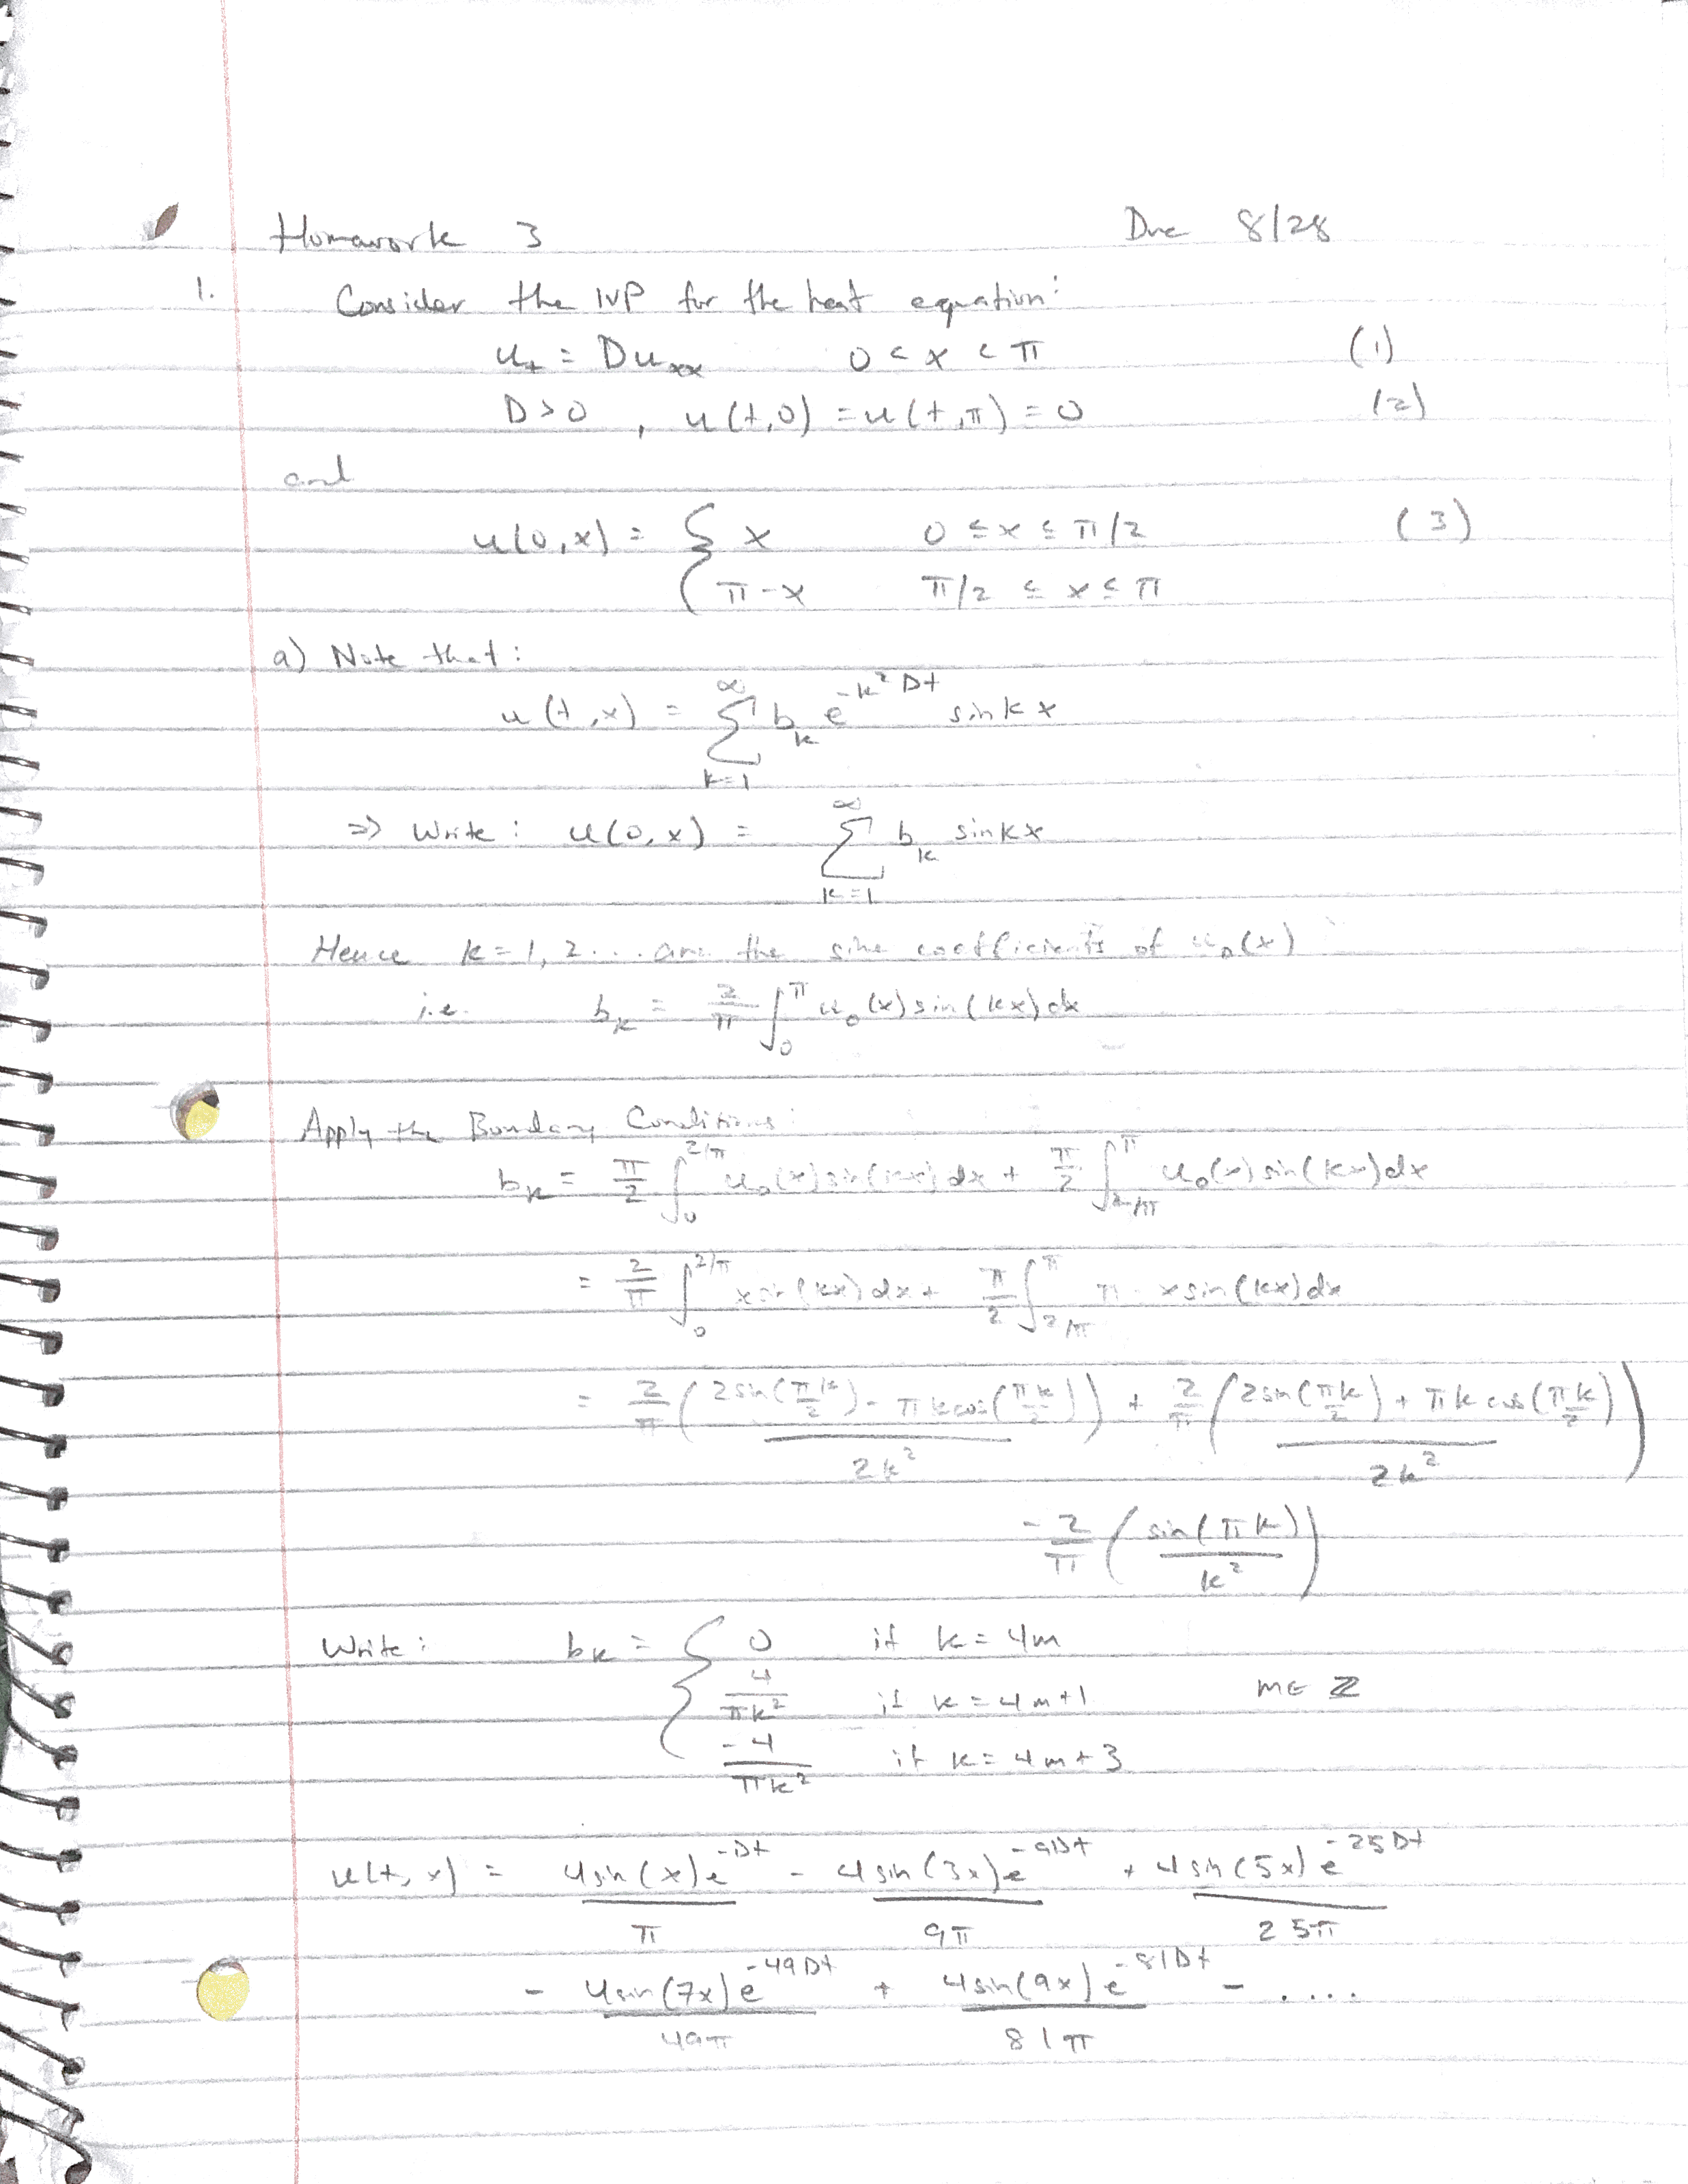

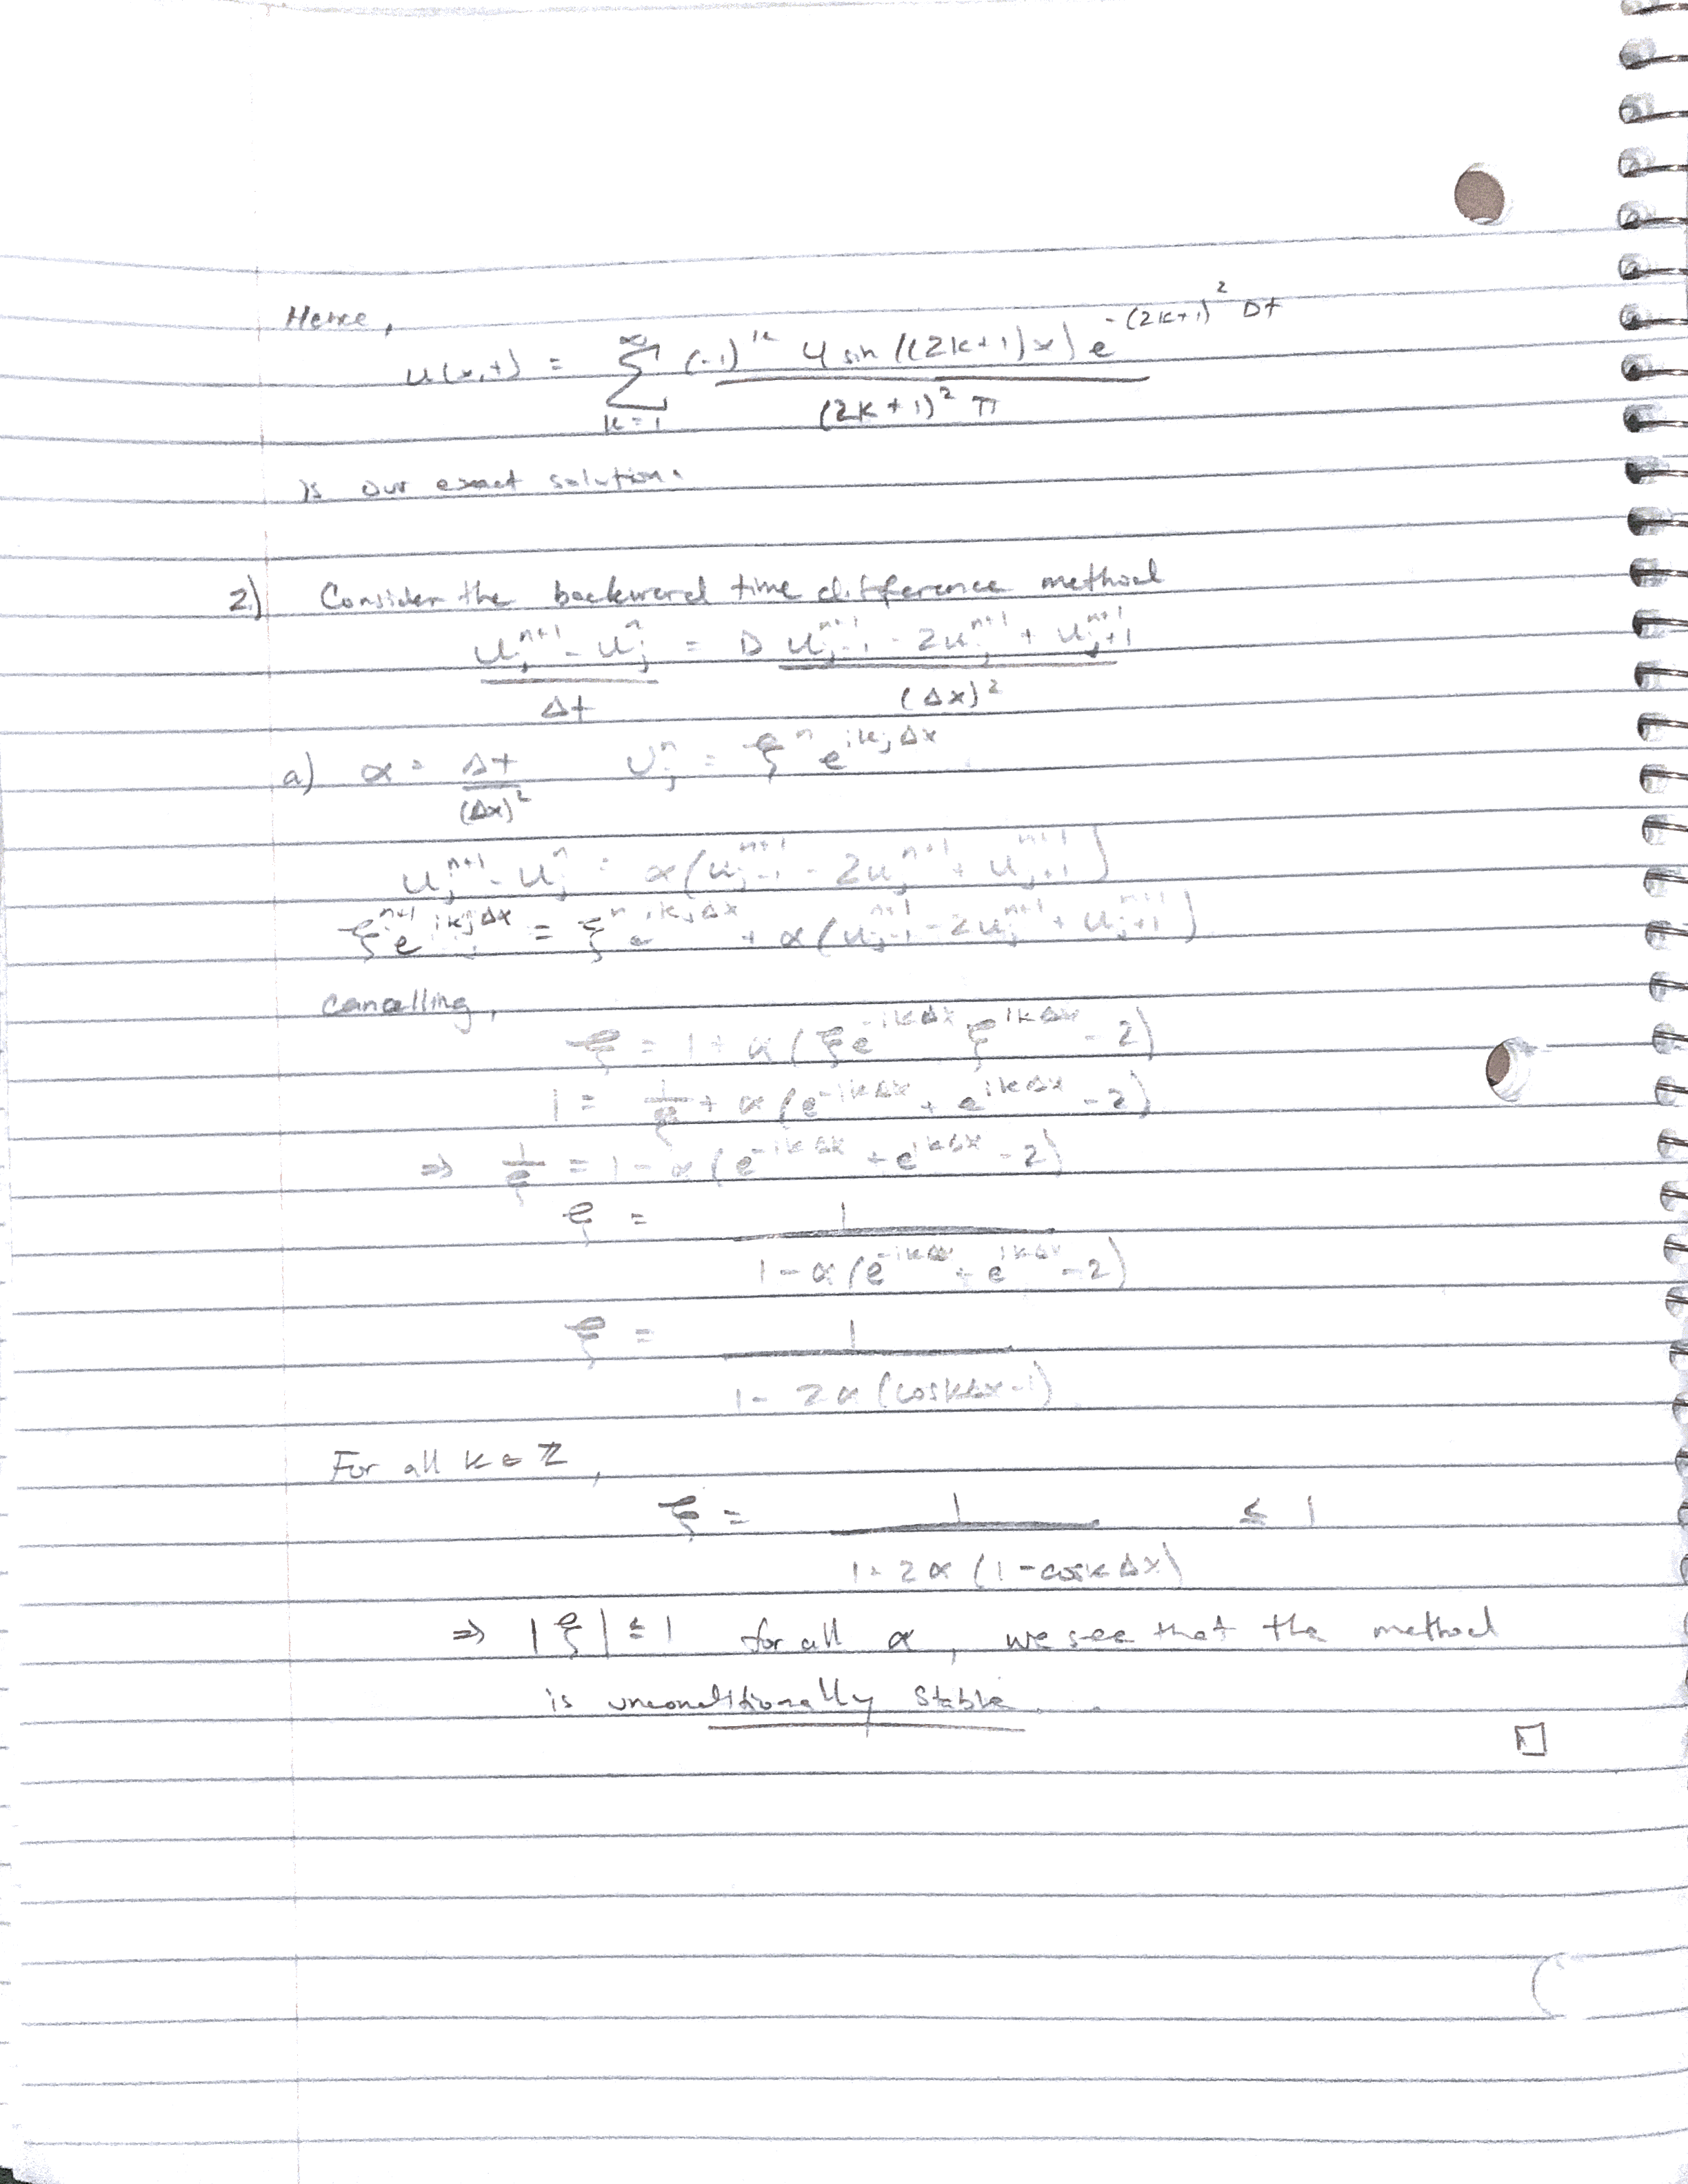